# 14_한국 복지 패널 데이터셋

> [https://www.koweps.re.kr:442](https://www.koweps.re.kr:442)

- 우리 나라의 각종 사회조사를 시행하고 데이터를 공개하는 사이트
- `SAS`라는 통계 분석 프로그램을 사용한 데이터셋 파일으 제공.
    - R로는 이파일을 불러 올수 있으나 Python은 불가능.
    - 예제 에서 사용된느 데이터 셋은 2017년도 조사 자료를 R에 Excel 형식으로 내보낸 파일임
    - 데이터셋의 전체 변수명에 대한 의미는 http://itpaper.co.kr/demo/py/codebook-excel.7z 참조
    
## 예제에서 사용될 변수들의 의미

![데이터표](dataset2017_fieldname.jpg)

## #01. 필요한 패키지 및 샘플 데이터 가져오기 

In [1]:
import numpy
import datetime as dt
import pandas as pd
from pandas import DataFrame
from pandas import ExcelFile
from matplotlib import pyplot

In [3]:
# 엑셀 파일을 원격으로 내려 받아 데이터프레임으로 변환 (다소 시간이 소요된다. 약 5-10분)
xlsx = ExcelFile("dataset2017.xlsx")
df = xlsx.parse(xlsx.sheet_names[0])
df

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


## #01. 조사대상들에 대한 성별 분포

### 1) 데이터 전처리

#### 성별 컬러만 추출

In [4]:
성별추출 = df.filter(['h12_g3'])
성별추출

,h12_g3
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


#### 성별 변수의 이름을 인식하기 쉬운 값으로 변경하기 

In [5]:
성별추출_df  = 성별추출.rename(columns={'h12_g3':'성별'})
성별추출_df

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


#### 성별값을 `남자`, `여자`로 변환

In [6]:
성별추출_df['성별'] =  numpy.where(성별추출_df['성별'] == 1, '남자','여자')
성별추출_df

,성별
0,여자
1,여자
2,남자
3,남자
4,여자
...,...
15417,여자
15418,여자
15419,남자
15420,여자


### 2) 데이터 정제

#### 결측치 확인

결측치가 없다는 것이 확인된다.

In [8]:
성별추출_df.isna().sum()

성별    0
dtype: int64

### 3) 데이터 분석

#### 성별의 데이터 분포 확인

In [9]:
성별분포 = 성별추출_df['성별'].value_counts()
성별분포

여자    8440
남자    6982
Name: 성별, dtype: int64

#### 변환된 값에 의한 성별 데이터 분포에 데이터프레임으로 만들기 

In [10]:
성별분포_df = DataFrame(성별분포)
성별분포_df

,성별
여자,8440
남자,6982


#### 생성된 데이터프레임의 컬럼이름을 `성별`에서 `명`으로 변경

In [11]:
성별분포_분석결과_df = 성별분포_df.rename(columns = {'성별':'명'})
성별분포_분석결과_df

,명
여자,8440
남자,6982


#### 비율순으로 정렬

In [13]:
성별분포_분석결과_df.sort_values('명', inplace=True)
성별분포_분석결과_df

,명
남자,6982
여자,8440


### 4) 데이터 시각화

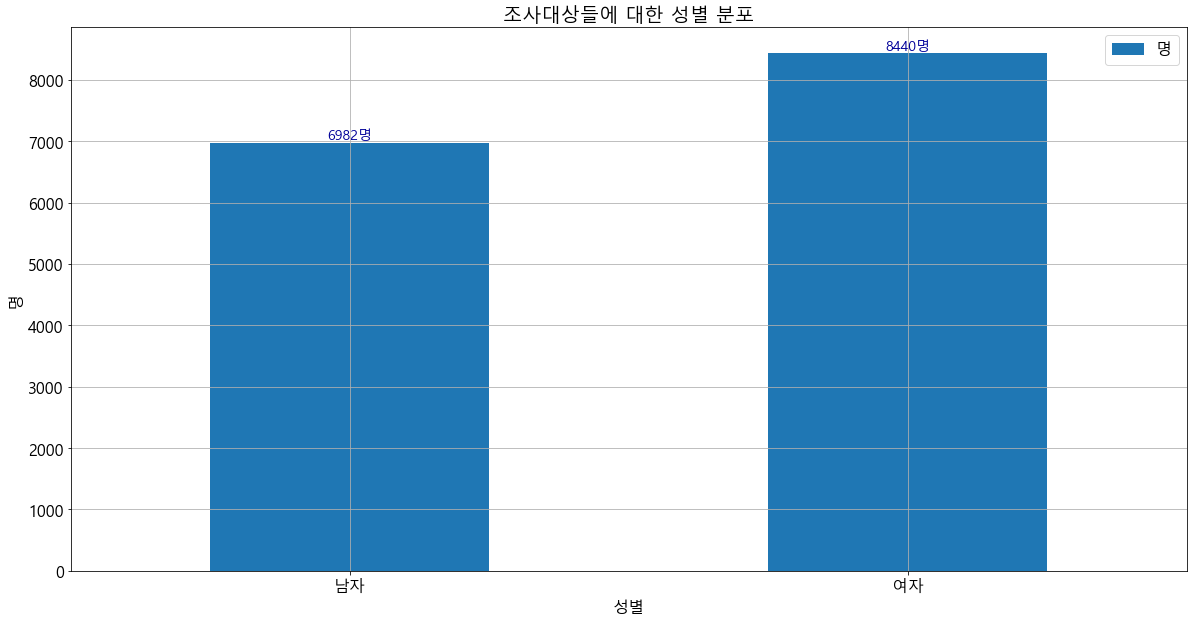

In [15]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,10)

성별분포_분석결과_df.plot.bar(rot=0)
pyplot.title('조사대상들에 대한 성별 분포')
pyplot.grid()
pyplot.xlabel('성별')
pyplot.ylabel('명')

for i, v in enumerate(list(성별분포_분석결과_df['명'])):
    txt = "%d명" %v
    pyplot.text(i,v,txt, fontsize=14, color='#000099',
               horizontalalignment='center', verticalalignment='bottom')
    
pyplot.show()    

## #02. 성별에 따른 평균 월급 차이 분석

### 1) 데이터 전처리

#### 성별과 월급 데이터만 추출

In [16]:
성별월급추출 = df.filter(['h12_g3', 'p1202_8aq1'])
성별월급추출

,h12_g3,p1202_8aq1
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


#### 성별과 월급 변수의 이름을 인식하기 쉬운 값으로 변경하기 

In [17]:
성별월급추출_df = 성별월급추출.rename(columns = {'h12_g3':'성별', 'p1202_8aq1':'월급'})
성별월급추출_df

,성별,월급
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


#### 성별값을 `남자`, `여자`로 변환

In [19]:
성별월급추출_df['성별'] = numpy.where(성별월급추출_df['성별'] ==1 , '남자', '여자')
성별월급추출_df

,성별,월급
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


### 2) 데이터 정제

#### 결측치 확인

In [20]:
성별월급추출_df.isna().sum()

성별        0
월급    10915
dtype: int64

#### 결측치 소거

In [21]:
성별월급추출_df.dropna(inplace=True)
성별월급추출_df.isna().sum()

성별    0
월급    0
dtype: int64

#### 이상치 결측 처리 

`1 ~ 9998` 범위를 벗어나는 값들에 대해 결측치 처리 

In [23]:
성별월급추출_df['월급'] = numpy.where(
                        ((성별월급추출_df['월급']<1) | (성별월급추출_df['월급'] > 8889)), 
                        numpy.nan, 성별월급추출_df['월급'])
성별월급추출_df

,성별,월급
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


#### 결측치 확인

In [24]:
성별월급추출_df.isna().sum()

성별     0
월급    14
dtype: int64

#### 결측치 소거

In [25]:
성별월급추출_df.dropna(inplace=True)
성별월급추출_df.isna().sum()

성별    0
월급    0
dtype: int64

### 3) 데이터 분석

#### 성별로 그룹화하여 그룹별 평균 구하기 

In [26]:
성별_월급_평균_df = 성별월급추출_df.groupby('성별').mean()
성별_월급_평균_df

,월급
성별,
남자,333.422185
여자,176.359967


### 4) 데이터 시각화

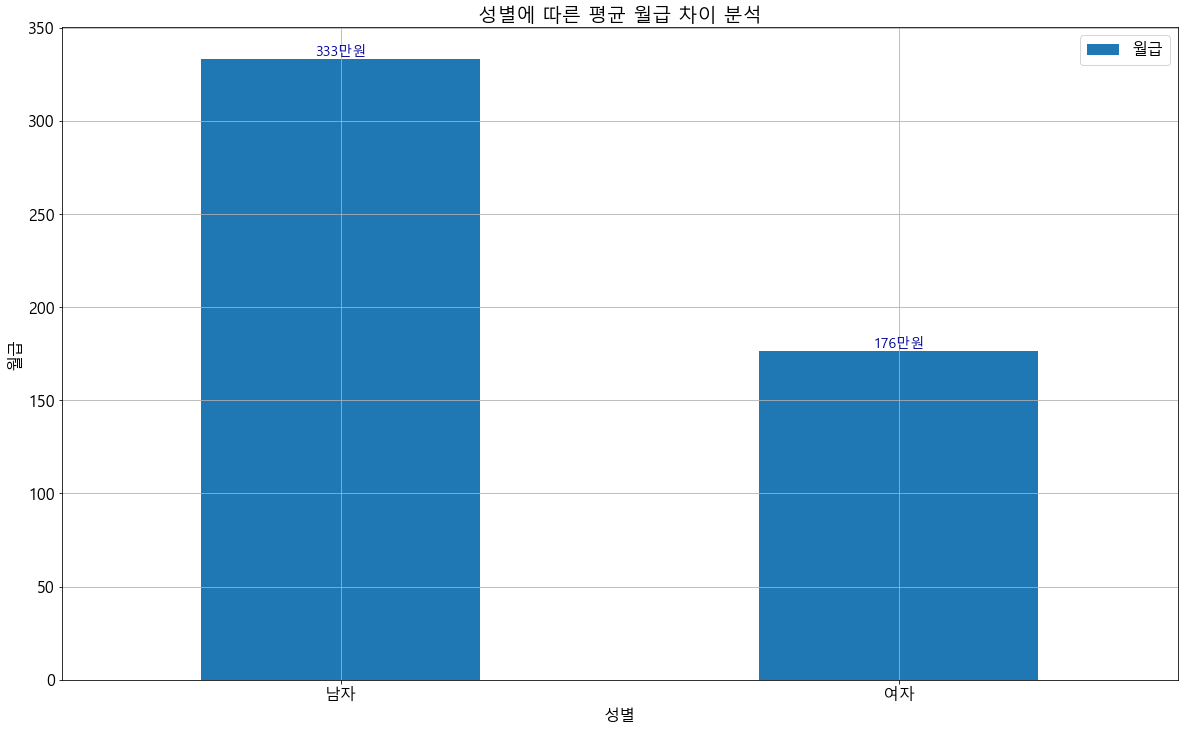

In [29]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,12)

성별_월급_평균_df.plot.bar(rot=0)
pyplot.title('성별에 따른 평균 월급 차이 분석')
pyplot.grid()
pyplot.xlabel('성별')
pyplot.ylabel('월급')

for i, v in enumerate(list(성별_월급_평균_df['월급'])):
    txt = "%d만원" %v
    pyplot.text(i,v,txt, fontsize=14, color='#000099',
               horizontalalignment='center', verticalalignment='bottom')
    
pyplot.show()   

## #03. 나이에 따른 평균 월급의 변화

### 1) 데이터 전처리

#### 태어난 년도, 월급에 대한 컬럼 추출

In [31]:
년도월급추출 = df.filter(['h12_g4', 'p1202_8aq1'])
년도월급추출

,h12_g4,p1202_8aq1
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


#### 태어난 년도와 월급 변수의 이름을 인식하기 쉬운 값으로 변경하기 

In [32]:
년도월급추출_df = 년도월급추출.rename(columns ={'h12_g4':'태어난년도', 'p1202_8aq1':'월급'})
년도월급추출_df

,태어난년도,월급
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


#### 나이를 계산하여 파생 변수 추가

In [33]:
yy = dt.datetime.now().year

년도월급추출_df['나이'] = yy - 년도월급추출_df['태어난년도'] +1 
년도월급추출_df

,태어난년도,월급,나이
0,1936,NaN,85
1,1945,NaN,76
2,1948,NaN,73
3,1942,108.9,79
4,1923,NaN,98
...,...,...,...
15417,1967,NaN,54
15418,1992,NaN,29
15419,1995,72.0,26
15420,1998,NaN,23


#### 결측치 확인

In [34]:
년도월급추출_df.isna().sum()

태어난년도        0
월급       10915
나이           0
dtype: int64

#### 결측치 정제

In [35]:
년도월급추출_df.dropna(inplace=True)
년도월급추출_df.isna().sum()

태어난년도    0
월급       0
나이       0
dtype: int64

#### 이상치 정제

##### 코드표에서 제시한 범위를 벗어난 값(1~9998)을 벗어나면  이상치 이므로 결측치로 변경해야 한다.

In [36]:
년도월급추출_df['월급'] = numpy.where(
                        ((년도월급추출_df['월급'] < 1) | (년도월급추출_df['월급'] > 9998)),
                          numpy.nan, 년도월급추출_df['월급'])
년도월급추출_df.isna().sum()

태어난년도     0
월급       14
나이        0
dtype: int64

In [37]:
년도월급추출_df.dropna(inplace=True)
년도월급추출_df.isna().sum()

태어난년도    0
월급       0
나이       0
dtype: int64

### 3) 데이터 분석

In [38]:
나이월급평균_df = 년도월급추출_df.filter(['나이','월급']).groupby('나이').mean()
나이월급평균_df 

,월급
나이,
23,89.333333
24,136.720000
25,140.807692
26,138.000000
27,145.652000
...,...
89,21.200000
90,25.000000
91,20.000000


### 4) 시각화

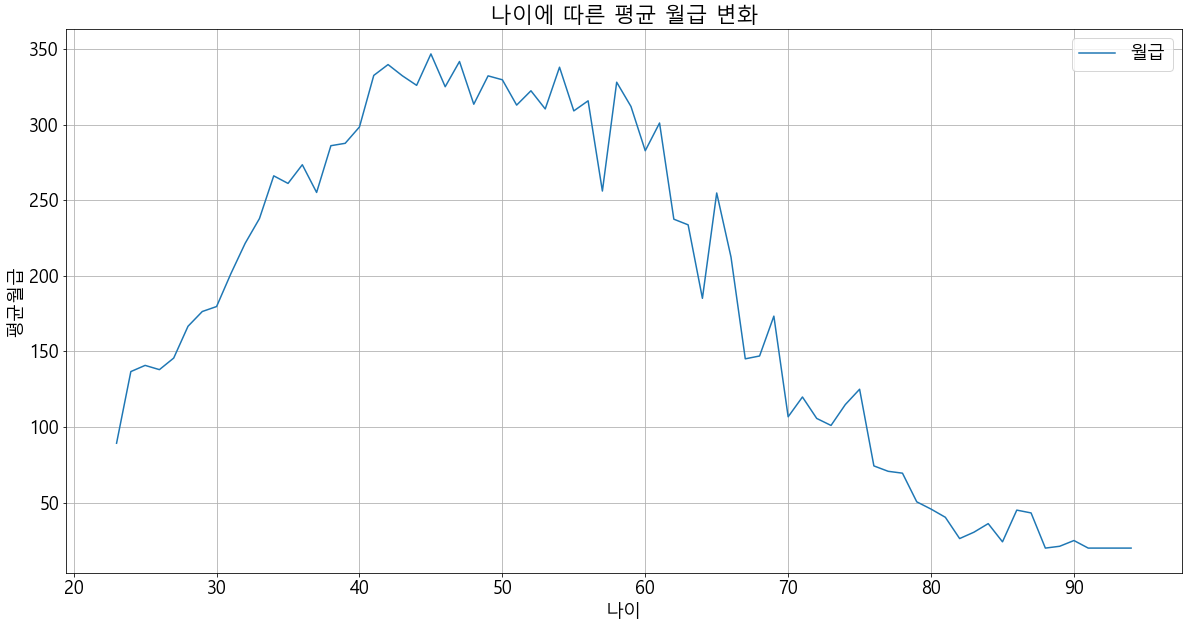

In [39]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

나이월급평균_df.plot()
pyplot.title('나이에 따른 평균 월급 변화')
pyplot.grid()
pyplot.xlabel('나이')
pyplot.ylabel('평균월급')

pyplot.show()  

## #04. 연령대 분포

### 1) 데이터 전처리 

#### 태어난 년도 컬럼 추출

In [40]:
년도추출 = df.filter(['h12_g4'])
년도추출

,h12_g4
0,1936
1,1945
2,1948
3,1942
4,1923
...,...
15417,1967
15418,1992
15419,1995
15420,1998


#### 태어난 년도 변수의 이름을 인식하기 쉬운 값으로 변경하기 

In [41]:
년도_df = 년도추출.rename(columns={'h12_g4':'태어난년도'})
년도_df

,태어난년도
0,1936
1,1945
2,1948
3,1942
4,1923
...,...
15417,1967
15418,1992
15419,1995
15420,1998


#### 태어난 년도에서 나이를 계산하여 파생변수 추가

In [42]:
년도_df['나이'] = dt.datetime.now().year - 년도_df['태어난년도'] + 1 
년도_df

,태어난년도,나이
0,1936,85
1,1945,76
2,1948,73
3,1942,79
4,1923,98
...,...,...
15417,1967,54
15418,1992,29
15419,1995,26
15420,1998,23


#### 나이 컬럼에서 연령대를 계산하여 파생변수 추가

##### 나이를 10으로 나눈 정수 부분의 몫만 구한 후 다시 10을 곱하면 연령대를 얻을 수 있다.

> 28세 --> 28 // 10 --> 2 <br>
2 * 10 --> 20 대

In [55]:
년도_df['연령대'] = (dt.datetime.now().year - 년도월급_df['태어난년도']+1) // 10 *10
년도_df

,태어난년도,나이,연령대
0,1936,85,80
1,1945,76,70
2,1948,73,70
3,1942,79,70
4,1923,98,90
...,...,...,...
15417,1967,54,50
15418,1992,29,20
15419,1995,26,20
15420,1998,23,20


### 2) 데이터 정제

#### 결측치 확인

In [56]:
년도_df.isna().sum()

태어난년도    0
나이       0
연령대      0
dtype: int64

### 3) 데이터 분석

#### 연령대에 대한 빈도수 계산 첫번째 방법

In [57]:
연령대분포_df1 = 년도_df.filter(['연령대','나이']).groupby('연령대').count()
연령대분포_df1

,나이
연령대,
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148


#### 연령대에 대한 빈도수 계산 두번째 방법

##### 값을 기준으로 정렬되므로 인덱스를 기준으롱 재정렬 필요

In [58]:
vcount = 년도_df['연령대'].value_counts()
연령대분포_df2 = DataFrame(vcount)
연령대분포_df2

,연령대
70,2190
80,2148
50,1994
60,1948
40,1946
20,1567
10,1442
30,1315
0,470
90,386


#### 연령대 순으롱 정렬

##### 연령대가 인덱스로 사용되고 있으므로 `sort_index()` 함수 사용

In [59]:
연령대분포_정렬_df = 연령대분포_df2.sort_index()
연령대분포_정렬_df

,연령대
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148
90,386


####  인덱스 이름 수정

##### 숫자값으로 사용되고 있는 인덱스에 `대` 라는 글자를 덧붙인다.

In [60]:
index_after = {}
for i in list(연령대분포_정렬_df.index):
    index_after[i] = "%d대"  %i
    
연령대분포_정렬_df.rename(index = index_after, inplace=True)    
연령대분포_정렬_df

,연령대
0대,470
10대,1442
20대,1567
30대,1315
40대,1946
50대,1994
60대,1948
70대,2190
80대,2148
90대,386


### 4) 시각화

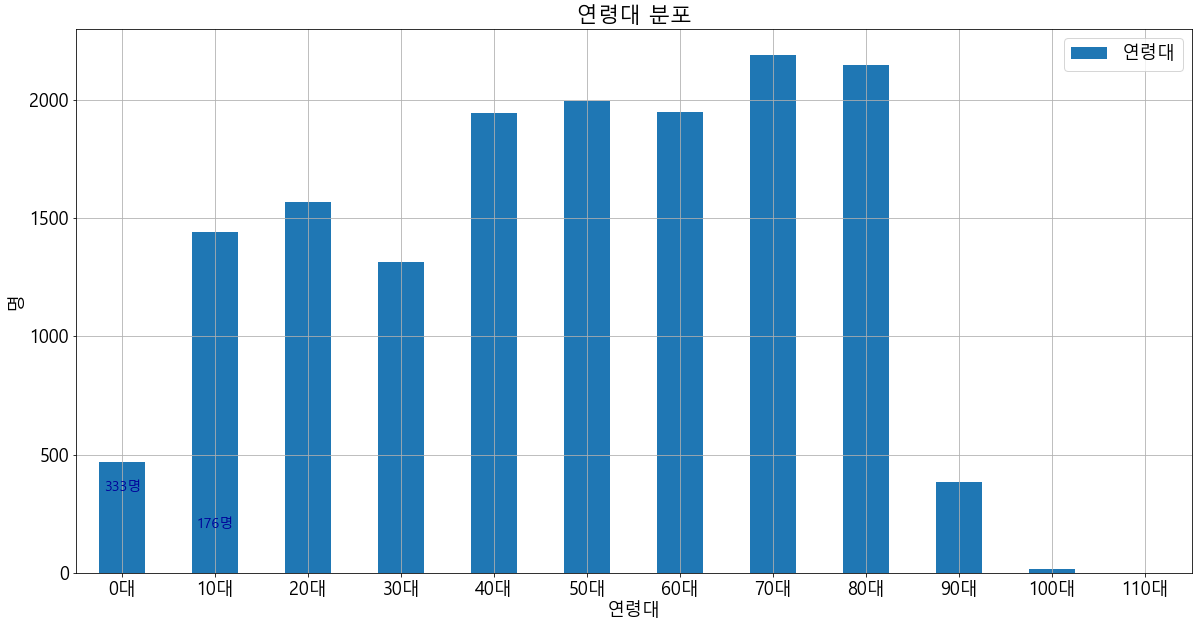

In [109]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

연령대분포_정렬_df.plot.bar(rot=0)
pyplot.title('연령대 분포')
pyplot.grid()
pyplot.xlabel('연령대')
pyplot.ylabel('명')

for i, v in enumerate(list(성별_월급_평균_df['월급'])):
    txt = "%d명" %v
    pyplot.text(i,v,txt, fontsize=14, color='#000099',
               horizontalalignment='center', verticalalignment='bottom')

pyplot.show()  

## #05. 연령대별 평균 급여의 변화

### 1) 데이터 전처리 

#### 태어난 년도, 월급 컬럼 추출

In [52]:
년도월급 = df.filter(['h12_g4', 'p1202_8aq1'])
년도월급

,h12_g4,p1202_8aq1
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


#### 태어난 년도와 월급 변수의 이름을 인식하기 쉬운 값으로 변경하기 

In [53]:
년도월급_df = 년도월급.rename(columns={'h12_g4':'태어난년도', 'p1202_8aq1' : '월급'})
년도월급_df

,태어난년도,월급
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


#### 태어난 년도 컬럼에서 연령대 계산하여 파생변수 추가

In [54]:
년도월급_df['연령대'] = (dt.datetime.now().year - 년도월급_df['태어난년도']+1) // 10 *10
년도월급_df

,태어난년도,월급,연령대
0,1936,NaN,80
1,1945,NaN,70
2,1948,NaN,70
3,1942,108.9,70
4,1923,NaN,90
...,...,...,...
15417,1967,NaN,50
15418,1992,NaN,20
15419,1995,72.0,20
15420,1998,NaN,20


### 2) 데이터 정제

### 결측치 확인

In [64]:
년도월급_df.isna().sum()

태어난년도        0
월급       10915
연령대          0
dtype: int64

#### 결측치 소거

In [65]:
년도월급_df.dropna(inplace=True)
년도월급_df.isna().sum()

태어난년도    0
월급       0
연령대      0
dtype: int64

### 3) 데이터 분석

#### 연령대별 평균 급여 계산

In [69]:
연령대별_평균급여_df = 년도월급_df.filter(['연령대','월급']).groupby('연령대').mean()
연령대별_평균급여_df

,월급
연령대,
20,154.890476
30,245.701425
40,328.371147
50,314.173167
60,226.846086
70,94.149102
80,35.000000
90,22.000000


#### 인덱스 이름 수정

##### 숫자값으로 사용되고 있는 인덱스에 `대` 라는 글자를 덧붙인다.

In [70]:
index_after = {} 
for i in list(연령대별_평균급여_df.index):
    index_after[i] = '%d대' %i
    
연령대별_평균급여_df.rename(index=index_after, inplace=True)    
연령대별_평균급여_df

,월급
연령대,
20대,154.890476
30대,245.701425
40대,328.371147
50대,314.173167
60대,226.846086
70대,94.149102
80대,35.000000
90대,22.000000


### 4) 시각화

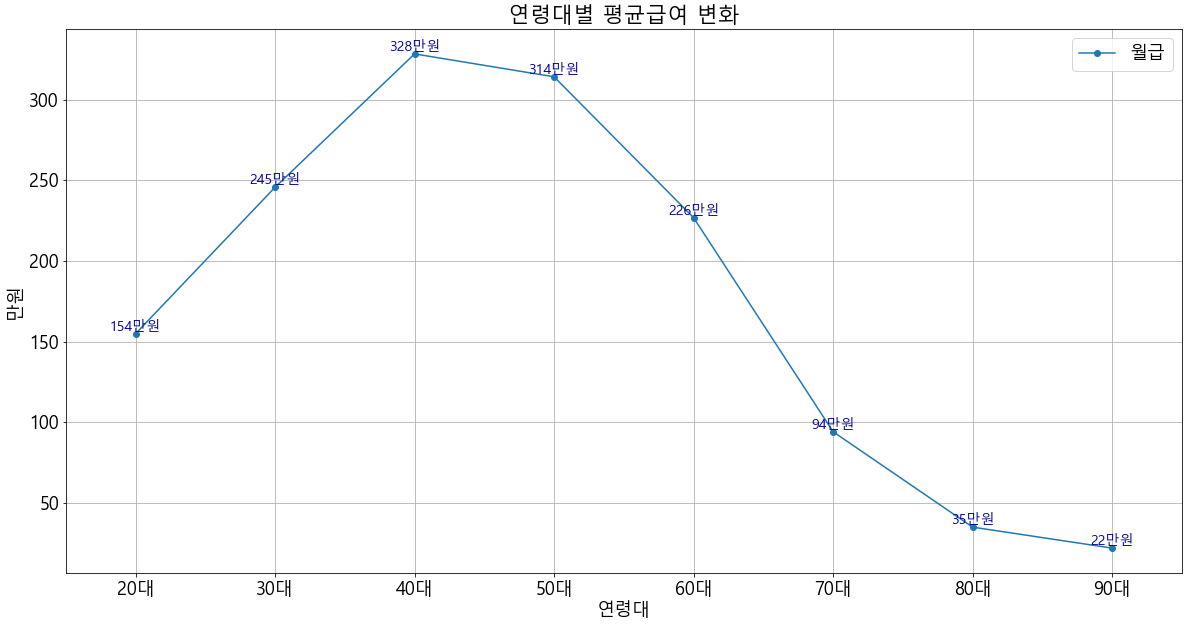

In [74]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

연령대별_평균급여_df.plot(marker="o")
pyplot.title('연령대별 평균급여 변화')
pyplot.grid()
pyplot.xlabel('연령대')
pyplot.ylabel('만원')
pyplot.xlim(-0.5, 7.5)

for i, v in enumerate(list(연령대별_평균급여_df['월급'])):
    txt = "%d만원" % v
    pyplot.text(i,v,txt, fontsize=14, color='#000099',
               horizontalalignment='center', verticalalignment='bottom')

pyplot.show()  

## #06. 성별과 연령대 분포

### 1) 데이터 전처리 

#### 성별과 태어난 년도 데이터 추출

In [75]:
성별년도 = df.filter(['h12_g3','h12_g4'])
성별년도

,h12_g3,h12_g4
0,2,1936
1,2,1945
2,1,1948
3,1,1942
4,2,1923
...,...,...
15417,2,1967
15418,2,1992
15419,1,1995
15420,2,1998


#### 성별과 태어난 년도 변수의 이름을 인식하기 쉬운 값으로 변경하기 

In [76]:
성별년도_df = 성별년도.rename(columns={'h12_g3':'성별', 'h12_g4':'태어난년도'})
성별년도_df

,성별,태어난년도
0,2,1936
1,2,1945
2,1,1948
3,1,1942
4,2,1923
...,...,...
15417,2,1967
15418,2,1992
15419,1,1995
15420,2,1998


####  성별값을 `남자`, `여자`로 변환

In [77]:
성별년도_df['성별'] = numpy.where(성별년도_df['성별'] == 1 , '남자', '여자')
성별년도_df

,성별,태어난년도
0,여자,1936
1,여자,1945
2,남자,1948
3,남자,1942
4,여자,1923
...,...,...
15417,여자,1967
15418,여자,1992
15419,남자,1995
15420,여자,1998


####  연련대별 계산하여 파생변수 추가

In [78]:
성별년도_df['연령대'] = (dt.datetime.now().year - 성별년도_df['태어난년도']+1) // 10 * 10
성별년도_df

,성별,태어난년도,연령대
0,여자,1936,80
1,여자,1945,70
2,남자,1948,70
3,남자,1942,70
4,여자,1923,90
...,...,...,...
15417,여자,1967,50
15418,여자,1992,20
15419,남자,1995,20
15420,여자,1998,20


### 2) 데이터 정제

In [79]:
성별년도_df.isna().sum()

성별       0
태어난년도    0
연령대      0
dtype: int64

### 3) 데이터 분석

#### 성별과 연령대별로 빈도수 계산하기 

##### as_index=False 는 groupby로 지정된 컬럼에서 같은 값을 갖는 셀을 병합하지 않는다

##### 주로 그래프 생성을 위해 사용.

In [80]:
연령대_성별_빈도_df = 성별년도_df.groupby(['성별', '연령대'], as_index=False).count()
연령대_성별_빈도_df

,성별,연령대,태어난년도
0,남자,0,239
1,남자,10,732
2,남자,20,710
3,남자,30,636
4,남자,40,981
5,남자,50,1004
6,남자,60,888
7,남자,70,834
8,남자,80,820
9,남자,90,132


#### `태어난년도` 컬럼은 성별과 연령층에 따른 사람의 수를 의미하므로 컬럼이름 변경

In [81]:
연령대_성별_집계_df = 연령대_성별_빈도_df.rename(columns={"태어난년도" : "명"})
연령대_성별_집계_df

,성별,연령대,명
0,남자,0,239
1,남자,10,732
2,남자,20,710
3,남자,30,636
4,남자,40,981
5,남자,50,1004
6,남자,60,888
7,남자,70,834
8,남자,80,820
9,남자,90,132


####  데이터 그룹 분석

##### `성별`이 컬럼, `연령대`가 인덱스로 사용되고 사람의 수가 데이터로 배치되도록 피벗테이블 구성

In [96]:
연령대_성별_pv = 연령대_성별_집계_df.pivot('연령대', '성별','명')
연령대_성별_pv

성별,남자,여자
연령대,,
0,239.0,231.0
10,732.0,710.0
20,710.0,857.0
30,636.0,679.0
40,981.0,965.0
50,1004.0,990.0
60,888.0,1060.0
70,834.0,1356.0
80,820.0,1328.0


#### 인덱스 이름 수정

##### 숫자값으로 사용되고 있는 인덱스에 `대` 라는 글자를 덧붙인다.

In [97]:
index_after = {}
for i in list(연령대_성별_pv.index):
    index_after[i] = "%d대"  % i
    
print(index_after)

연령대_성별_pv.rename(index=index_after, inplace=True)
연령대_성별_pv

{0: '0대', 10: '10대', 20: '20대', 30: '30대', 40: '40대', 50: '50대', 60: '60대', 70: '70대', 80: '80대', 90: '90대', 100: '100대', 110: '110대'}


성별,남자,여자
연령대,,
0대,239.0,231.0
10대,732.0,710.0
20대,710.0,857.0
30대,636.0,679.0
40대,981.0,965.0
50대,1004.0,990.0
60대,888.0,1060.0
70대,834.0,1356.0
80대,820.0,1328.0


### 4) 시각화

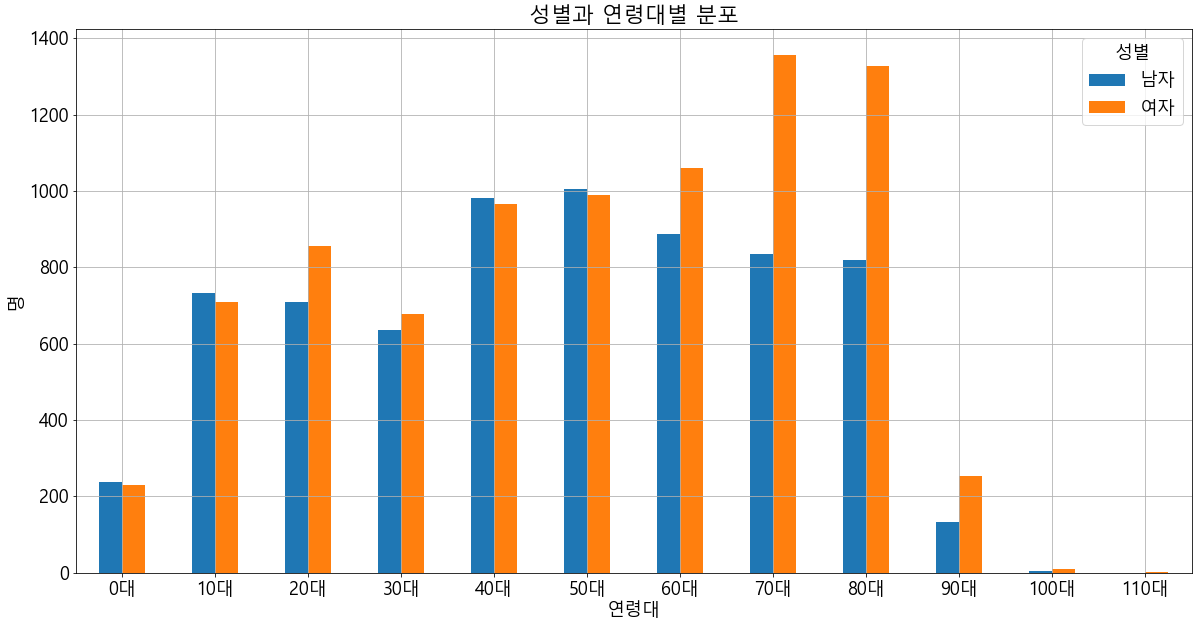

In [108]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

연령대_성별_pv.plot.bar(rot=0)
pyplot.title('성별과 연령대별 분포')
pyplot.grid()
pyplot.xlabel('연령대')
pyplot.ylabel('명')


pyplot.show() 

## #07 성별과 연령대에 따른 평균 급여

### 1) 데이터 전처리 

#### 성별과 태어난 년도, 월급  데이터 추출

In [118]:
성별년도급여 = df.filter(['h12_g3','h12_g4', 'p1202_8aq1'])
성별년도급여

,h12_g3,h12_g4,p1202_8aq1
0,2,1936,NaN
1,2,1945,NaN
2,1,1948,NaN
3,1,1942,108.9
4,2,1923,NaN
...,...,...,...
15417,2,1967,NaN
15418,2,1992,NaN
15419,1,1995,72.0
15420,2,1998,NaN


#### 성별과 태어난 년도, 급여 변수의 이름을 인식하기 쉬운 값으로 변경하기

In [119]:
성별년도급여_df = 성별년도급여.rename(columns={'h12_g3':'성별', 'h12_g4':'태어난년도','p1202_8aq1':'급여'})
성별년도급여_df

,성별,태어난년도,급여
0,2,1936,NaN
1,2,1945,NaN
2,1,1948,NaN
3,1,1942,108.9
4,2,1923,NaN
...,...,...,...
15417,2,1967,NaN
15418,2,1992,NaN
15419,1,1995,72.0
15420,2,1998,NaN


#### 성별 컬럼에 대한 값 변경

In [120]:
성별년도급여_df['성별'] = numpy.where(성별년도급여_df['성별']==1, '남자','여자')
성별년도급여_df

,성별,태어난년도,급여
0,여자,1936,NaN
1,여자,1945,NaN
2,남자,1948,NaN
3,남자,1942,108.9
4,여자,1923,NaN
...,...,...,...
15417,여자,1967,NaN
15418,여자,1992,NaN
15419,남자,1995,72.0
15420,여자,1998,NaN


#### 연령대별 계산하여 파생변수 추가

In [121]:
성별년도급여_df['연령대'] = (dt.datetime.now().year - 성별년도급여_df['태어난년도']+1) // 10 *10
성별년도급여_df

,성별,태어난년도,급여,연령대
0,여자,1936,NaN,80
1,여자,1945,NaN,70
2,남자,1948,NaN,70
3,남자,1942,108.9,70
4,여자,1923,NaN,90
...,...,...,...,...
15417,여자,1967,NaN,50
15418,여자,1992,NaN,20
15419,남자,1995,72.0,20
15420,여자,1998,NaN,20


### 2) 데이터 정제

#### 결측치 확인하기

In [122]:
성별년도급여_df.isna().sum()

성별           0
태어난년도        0
급여       10915
연령대          0
dtype: int64

#### 결측치 삭제 후 재확인

In [123]:
성별년도급여_df.dropna(inplace=True)
성별년도급여_df.isna().sum()

성별       0
태어난년도    0
급여       0
연령대      0
dtype: int64

### 4) 데이터 분석

#### 분석에 필요한 컬럼만 추출하여 성별과 연령대에 따른 평균 급여 구하기 

In [124]:
성별_연령대별_평균급여_df = 성별년도급여_df.filter(['성별','연령대','급여']).groupby(['성별','연령대'], as_index=False ).mean()
성별_연령대별_평균급여_df

,성별,연령대,급여
0,남자,20,156.181818
1,남자,30,274.759589
2,남자,40,400.574993
3,남자,50,412.705997
4,남자,60,305.555241
5,남자,70,131.130986
6,남자,80,42.545455
7,남자,90,20.000000
8,여자,20,154.322286
9,여자,30,214.197772


#### 피벗 테이블 구성

##### 연령대 인덱스로, 성별을 컬럼으로 하는 데이터프레임에 월급 데이터를 재배치한다.

> 그래프 생성시 인덱스가 x축, 컬럼이 그래프의 각 섹션, 데이터가 y축이 된다.

In [125]:
성별_연령대별_평균급여_pivot = 성별_연령대별_평균급여_df.pivot('연령대','성별','급여')
성별_연령대별_평균급여_pivot

성별,남자,여자
연령대,,
20,156.181818,154.322286
30,274.759589,214.197772
40,400.574993,220.524301
50,412.705997,197.562742
60,305.555241,141.091975
70,131.130986,66.797917
80,42.545455,29.939024
90,20.000000,22.500000


#### 인덱스 이름 수정

In [126]:
index_after = {}
for i in list(성별_연령대별_평균급여_pivot.index):
    index_after[i] = "%d대" %i
    
성별_연령대별_평균급여_pivot.rename(index=index_after, inplace=True)    
성별_연령대별_평균급여_pivot

성별,남자,여자
연령대,,
20대,156.181818,154.322286
30대,274.759589,214.197772
40대,400.574993,220.524301
50대,412.705997,197.562742
60대,305.555241,141.091975
70대,131.130986,66.797917
80대,42.545455,29.939024
90대,20.000000,22.500000


### 4)시각화

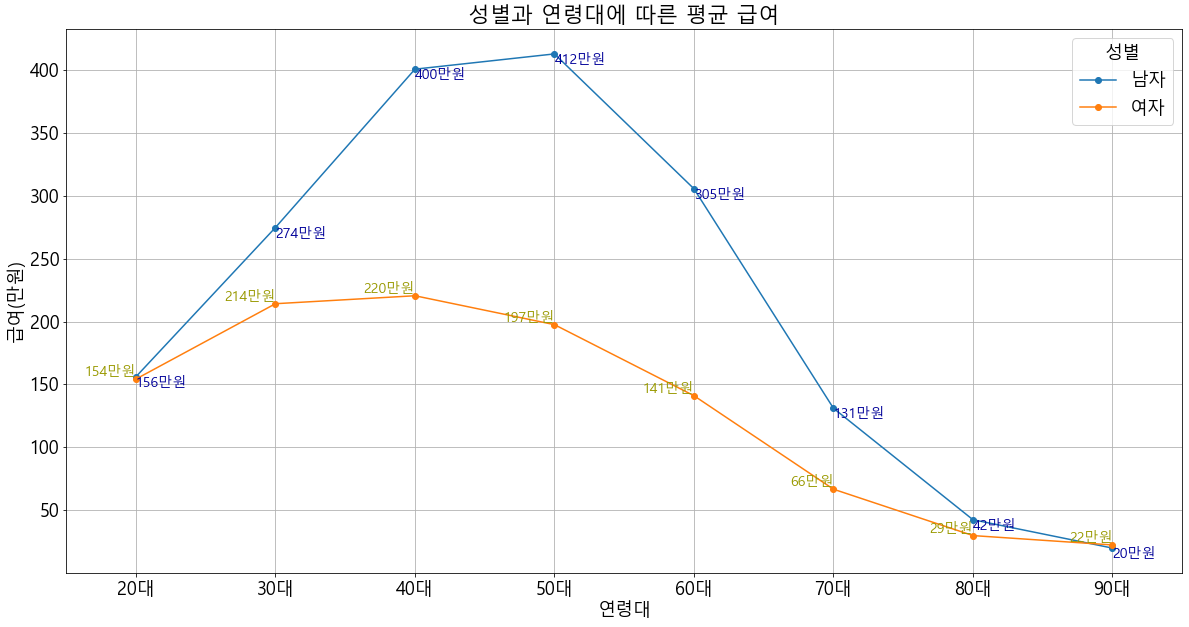

In [146]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

성별_연령대별_평균급여_pivot.plot(marker="o")
pyplot.title('성별과 연령대에 따른 평균 급여')
pyplot.grid()
pyplot.xlabel('연령대')
pyplot.ylabel('급여(만원)')
pyplot.xlim(-0.5, 7.5)

for i, v in enumerate(list(성별_연령대별_평균급여_pivot['남자'])):
    txt = "%d만원" % v
    pyplot.text(i,v,txt, fontsize=14, color='#000099',
               horizontalalignment='left', verticalalignment='top')

for i, v in enumerate(list(성별_연령대별_평균급여_pivot['여자'])):
    txt = "%d만원" % v
    pyplot.text(i,v,txt, fontsize=14, color='#999900',
               horizontalalignment='right', verticalalignment='bottom')
pyplot.show()  

## #08. 지역별 연령층 분포와 연령층별 지역 비율

### 1) 데이터 처리 

#### 성별과 태어난 년도 데이터 추출, 나이 변수 추가, 태어난 년도 컬럼 삭제

In [149]:
지역년도 = df.filter(['h12_g4', 'h12_reg7'])
지역년도df = 지역년도.rename(columns={'h12_g4':'태어난년도', 'h12_reg7':'지역코드'})
지역년도df['나이'] = dt.datetime.now().year - 지역년도df['태어난년도'] + 1 
지역년도df.drop('태어난년도', axis=1, inplace=True)
지역년도df

,지역코드,나이
0,1,85
1,1,76
2,1,73
3,1,79
4,1,98
...,...,...
15417,5,54
15418,5,29
15419,5,26
15420,5,23


#### 지역코드와 매칭될 코드표 만들기

In [150]:
지역코드표df = DataFrame({'지역코드':list(range(1,8)),
                     '지역':["서울","인천,경기","부산,경남,울산","대구,경북","대전,충남","강원,충북","광주,전남,전북,제주"]})
지역코드표df

,지역코드,지역
0,1,서울
1,2,"인천,경기"
2,3,"부산,경남,울산"
3,4,"대구,경북"
4,5,"대전,충남"
5,6,"강원,충북"
6,7,"광주,전남,전북,제주"


#### 원래의 데이터 프레임에 지역코드표 병합

##### 양쪽의 데이터프레임에서 공통되는 컬럼을 기준으로 병합.

- `how` 가 명시되지 않을 경우 양쪽에 겹치는 항목들만 병합
- `how="left|right"` 인 경우 한쪽을 기준으로 반대쪽의 항목들이 겹치는 항목들만 병합
- `how="outer"` 인 경우 겹치지 않는 데이터들도 모두 병합

In [151]:
지역나이df = pd.merge(지역년도df, 지역코드표df, how='outer')
지역나이df

,지역코드,나이,지역
0,1,85,서울
1,1,76,서울
2,1,73,서울
3,1,79,서울
4,1,98,서울
...,...,...,...
15417,3,18,"부산,경남,울산"
15418,3,15,"부산,경남,울산"
15419,3,37,"부산,경남,울산"
15420,3,37,"부산,경남,울산"


### 2) 데이터 정제

#### 결측치 여부 확인

In [152]:
지역나이df.isna().sum()

지역코드    0
나이      0
지역      0
dtype: int64

### 3) 데이버 분석

#### 연령층 구분

In [153]:
# 연령층을 구분하기 위한 나이의 구간을 설정하는 조건들을 리스트로 설정
conditions = [ (지역나이df['나이'] < 30),
               (지역나이df['나이'] < 60),
               (지역나이df['나이'] >= 60)]

# 조건에 따라 부여될 값
level = ['청년층', '중년층', '노년층']

# 조건에 따른 련령층 추가 하기 
지역나이df['연령층'] = numpy.select(conditions, level)
지역나이df

,지역코드,나이,지역,연령층
0,1,85,서울,노년층
1,1,76,서울,노년층
2,1,73,서울,노년층
3,1,79,서울,노년층
4,1,98,서울,노년층
...,...,...,...,...
15417,3,18,"부산,경남,울산",청년층
15418,3,15,"부산,경남,울산",청년층
15419,3,37,"부산,경남,울산",중년층
15420,3,37,"부산,경남,울산",중년층


#### 지역과 연령층에 대한 그룹분석

In [159]:
지역별연령층df = 지역나이df.filter(['지역', '연령층','나이']).groupby(['지역','연령층'], as_index = False).count()
지역별연령층df 

,지역,연령층,나이
0,"강원,충북",노년층,567
1,"강원,충북",중년층,361
2,"강원,충북",청년층,252
3,"광주,전남,전북,제주",노년층,1283
4,"광주,전남,전북,제주",중년층,867
5,"광주,전남,전북,제주",청년층,599
6,"대구,경북",노년층,973
7,"대구,경북",중년층,537
8,"대구,경북",청년층,364
9,"대전,충남",노년층,591


#### '나이' 컬럼 이름 변경

In [160]:
지역별연령층df.rename(columns={'나이':'조사인원'}, inplace=True)
지역별연령층df

,지역,연령층,조사인원
0,"강원,충북",노년층,567
1,"강원,충북",중년층,361
2,"강원,충북",청년층,252
3,"광주,전남,전북,제주",노년층,1283
4,"광주,전남,전북,제주",중년층,867
5,"광주,전남,전북,제주",청년층,599
6,"대구,경북",노년층,973
7,"대구,경북",중년층,537
8,"대구,경북",청년층,364
9,"대전,충남",노년층,591


#### 분석결과를 피벗테이블로 구성

##### 피벗테이블 구성시 컬럼명의 순서는 오름차순이 기본으로 적용된다.

In [161]:
지역별연령층pv = 지역별연령층df.pivot('지역','연령층','조사인원')
지역별연령층pv

연령층,노년층,중년층,청년층
지역,,,
"강원,충북",567,361,252
"광주,전남,전북,제주",1283,867,599
"대구,경북",973,537,364
"대전,충남",591,443,321
"부산,경남,울산",1189,844,531
서울,858,868,482
"인천,경기",1227,1335,930


#### 컬럼순서 변경

In [162]:
지역별연령층pv = 지역별연령층pv.reindex(columns=['청년층','중년층','노년층'])
지역별연령층pv 

연령층,청년층,중년층,노년층
지역,,,
"강원,충북",252,361,567
"광주,전남,전북,제주",599,867,1283
"대구,경북",364,537,973
"대전,충남",321,443,591
"부산,경남,울산",531,844,1189
서울,482,868,858
"인천,경기",930,1335,1227


### 4) 시각화

#### 1)  각 지역별 연령층 분포 비교

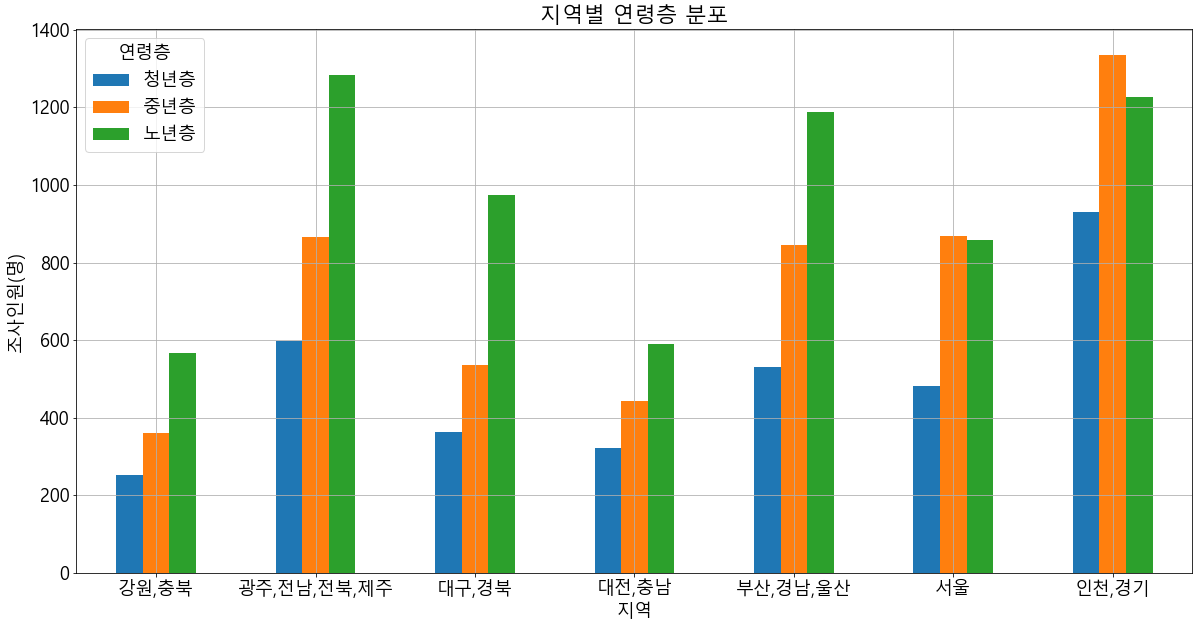

In [163]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

지역별연령층pv.plot.bar(rot=0)
pyplot.title('지역별 연령층 분포')
pyplot.grid()
pyplot.xlabel('지역')
pyplot.ylabel('조사인원(명)')



pyplot.show()  

#### 2) 연령층별 지역분포 비율

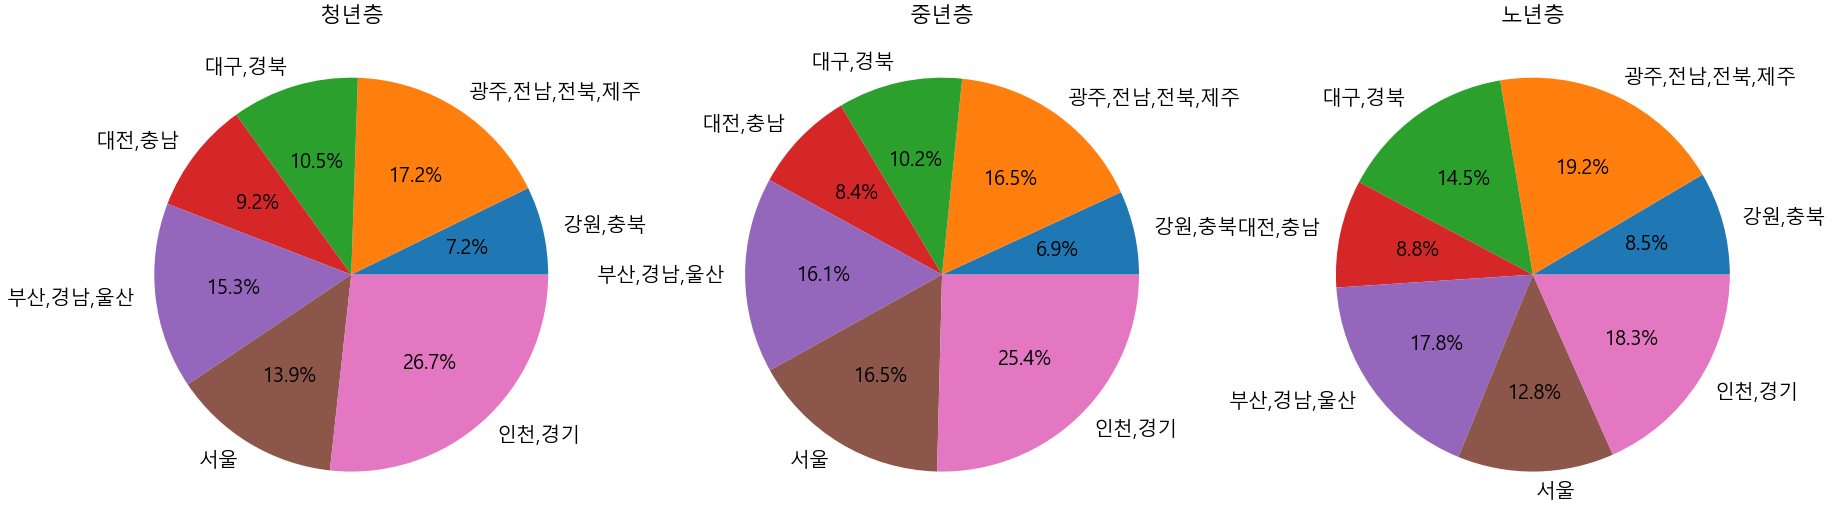

In [165]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (30,20)

fig = pyplot.figure()            # 영역을 나눌 수 있는 객체 생성
ax1 = fig.add_subplot(1,3,1)    # 1행 3열의 영역 중에서 첫 번째 영역
ax2 = fig.add_subplot(1,3,2)    # 1행 3열의 영역 중에서 두 번째 영역
ax3 = fig.add_subplot(1,3,3)    # 1행 3열의 영역 중에서 세 번째 영역

지역별연령층pv['청년층'].plot.pie(ax=ax1, autopct="%0.1f%%", textprops={'color':"#000000", 'fontsize':20})
ax1.title.set_text("청년층")
ax1.set(ylabel=None)         

지역별연령층pv['중년층'].plot.pie(ax=ax2, autopct="%0.1f%%", textprops={'color':"#000000", 'fontsize':20})
ax2.title.set_text("중년층")
ax2.set(ylabel=None)         

지역별연령층pv['노년층'].plot.pie(ax=ax3, autopct="%0.1f%%", textprops={'color':"#000000", 'fontsize':20})
ax3.title.set_text("노년층")
ax3.set(ylabel=None)         


pyplot.show()  